In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Runge-Kutta function approximation 
## input:  dt = time step (float)
##         t_final = final time, from which number of steps is calculated (float)
##         g = function of x and t that the first order derivative is equal to, aka dx/dt = g(x,t) (method)
##         x0 = initial value of x (float)
##         t0 = initial value of t, default to 0.0 (float)
## output: t_list: list of time values where function was approximated (numpy array)
##         x_list: list of x approximations for each t value in t_list (numpy array)

def rk4_approx(dt, t_final, g, x0, t0=0.0):
    
    #create lists to contain approximations
    x_list = []
    t_list = []
    
    # number of time steps
    n  = int(t_final/dt) 
    
    #Approximation loop that continuously updates x and t values according to 
    #rk approximation. Tracks each update in master lists that the function returns.
    for i in range(n):
        if i == 0.0:
            x = x0
            t = t0
            
        else:
            k1 = dt*g(x,t)
            k2 = dt*g(x+k1/2,t+dt/2)
            k3 = dt*g(x+k2/2,t+dt/2)
            k4 = dt*g(x+k3,t+dt)
            
            x = x + (k1 + 2*k2 + 2*k3 + k4)/6
            t = t + dt
            
        x_list.append(x)
        t_list.append(t)
        
    x_list = np.array(x_list)
    t_list = np.array(t_list)

    return t_list,x_list




    

# Problem 1.
## a. ODE
By Kirchhoff's Law, the voltage in must equal the voltage out:
<br>
$V_{in} = V_R + V_{out}$ 
<br>
$V_R = IR = RC\frac{dV_{out}}{dt}$
<br>
$V_{in} = RC\frac{dV_{out}}{dt} + V_{out}$
<br>
Solving for the first derivative of $V_{out}$, we get:
<br>
$\frac{dV_{out}}{dt} = \frac{V_{in} - V_{out}}{RC}$



### Exact Solution


Solving this ODE involves finding a characteristic solution to 
<br>
$\frac{dV_{out}}{dt} + \frac{V_{out}}{RC} = 0$ 
<br>
and adding it to the particular solution of 
<br>
$\frac{dV_{out}}{dt} + \frac{V_{out}}{RC} = \frac{V_{in}}{RC}$.
<br>
<br>
For the characteristic equation, we assume an ansatz of 
<br>
$V_{out} = Ae^{\alpha t}$
<br>
and solve for $\alpha$ using the characteristic ODE. This produces:
<br>
$V_{out,c}(t) = V_0e^{\frac{-t}{RC}}$
<br>
where we recognize the constant A as the out-voltage at time 0 for the characteristic equation.
<br>
<br>
For the particular solution, we try an ansatz similar to the particular solution:
<br>
$V_{out,p} = V_{in}$
<br>
This successfully solves the particular equation.
<br>
<br>
The general solution is given by:
<br>
$V_{out} = V_{out,c} + V_{out,p} = V_0e^{\frac{-t}{RC}} + V_{in}$
<br>
<br>
This exact solution will be used to test our approximation methods.



## b. Approximations

In [3]:
## exact solution
## input:  t = times to sample Vout (array)
##         RC = resistance times capacitance of circuit (float)
##         V0 = constant of particular solution (float)
##         Vin = voltage applied to circuit (float)
## output: exact solution of ODE (array)

def voltage_exact(t,RC,V0,Vin):
    V = V0*np.exp(-1*t/RC)

    return V+Vin(t)

In [4]:
## naive way of measuring error between functions
## input:  x_exact = exact values (array)
##         x_approx = approximated values (array)
## output: mean absolute error between corresponding points
def mean_absolute_error(t_approx,x_approx,exact,RC,V0,Vin):
    x_exact = exact(t_approx,RC,V0,Vin)
        
    return np.mean(np.abs(x_exact-x_approx))

In [5]:
# defines Vin
# input:  t = time (either float or array)
# output: V = the input voltage (either scalar or array)
def square_wave(t):
    
    t_prime = t - np.floor(t)
    if type(t) is float:
        if t_prime < 0.5:
            V = 1
        else:
            V = -1
    else:
        
        V = np.zeros(len(t))
        
        for i in range(len(V)):
            if t_prime[i] < 0.5:
                V[i] = 1
            else:
                V[i] = -1
    return V


In [6]:
#set time and constants
t0 = 0
tf = 10.0
dt = .001
t = np.linspace(t0,tf,10000)

V0 = -1
V_init = 0 


In [7]:
## expedited way to test our ode approximator
def test_ode_solver(RC):
    #get exact solution for V
    V_exact = voltage_exact(t,RC,V0,square_wave)

    #define first derivative function
    def ode(V,t,Vin=square_wave,RC=RC):
        return (Vin(t) - V)/RC

    #get approximate solution for V
    t_approx,V_approx = rk4_approx(dt,tf,ode,V_init)
    
    #plot results
    plt.plot(t,V_exact,'r',linewidth=7,label='Exact Solution')
    plt.plot(t_approx,V_approx,'bo',markersize=3,label='Approximation')
    plt.xlabel('Time')
    plt.ylabel('Voltage Out')
    plt.title('V vs. T, RC = ' + str(RC))
    plt.legend()
    
    print('Mean absolute error for RC = ' + str(RC) + ': ' + str(mean_absolute_error(t_approx,V_approx,voltage_exact,RC,V0,square_wave)))
    

Mean absolute error for RC = 0.01: 0.0383332028842


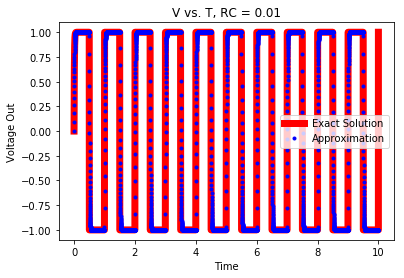

In [8]:
test_ode_solver(RC = 0.01)

Mean absolute error for RC = 0.1: 0.375374799845


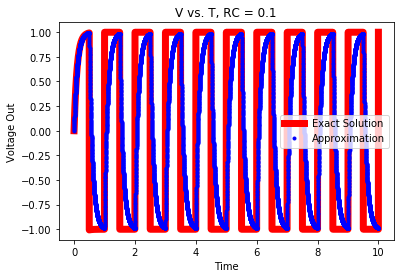

In [9]:
test_ode_solver(RC = 0.1)

Mean absolute error for RC = 1: 0.949237847972


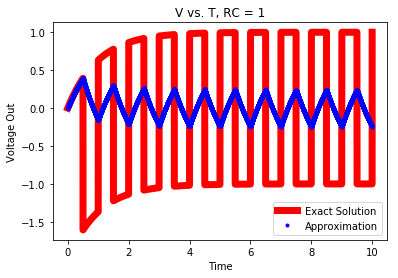

In [10]:
test_ode_solver(RC = 1)

## c. Physical Interpretation

The voltage difference between 'in' and 'out' exponentially approaches 0. The RC value slows down the charging up of the capacitor. As you increase the RC value, the longer it takes the capacitor to charge up, and $V_{out}$ to reach $V_{in}$.

# Problem 2

## a. Exact Solution

Using the same methods as above:
<br> 
$N_A = N_{A,0}e^{\frac{-t}{\tau_A}}$
<br>
<br>
$N_B = N_{B,0}e^{\frac{-t}{\tau_B}} + N_{A,0}\frac{\tau_B}{\tau_A-\tau_B}e^{\frac{-t}{\tau_A}}$

## b. Approximations

In [11]:
## exact solution for N_A
## input:  t = time (array)
##         tA = decay time constant for particle A
##         tB = decay time constant for particle B
##         NA_0 = initial number of A particles
## output: NA = exact value of N_A(t)
def NAdecay_exact(t,tA,tB,N_0):
    NA = N_0[0]*np.exp(-1*t/tA)
    
    return NA
## exact solution for N_B
## input:  t = time (array)
##         tA = decay time constant for particle A
##         tB = decay time constant for particle B
##         NA_0 = initial number of A particles
## output: NB = exact value of N_B(t)
def NBdecay_exact(t,tA,tB,N_0):
    NB = N_0[1]*np.exp(-t/tB) + (N_0[0]*np.exp(-1*t/tA))*(tB/(tA-tB))

    return NB

In [12]:
#expedited way to test ode approximator for different tA and tB
def decay_test_ode_solver(N_0,tA,tB):
    
    # ode governing N_A
    def NA_ode(N,t,tA=tA):
        return -1*N[0]/tA
    
    # ode governing N_B
    def NB_ode(N,t,tA=tA,tB=tB):
        return N[0]/tA - N[1]/tB
    
    # set time frame
    dt = .01
    t0 = 0.0
    tf = 100
    t = np.linspace(t0,tf,10000)
    
    # creates array of coupled ODEs
    def g(N,t):
        
        return np.array([NA_ode(N,t),NB_ode(N,t)])
    
    
    # Set intial N_B
    N_init = np.array([N_0[0],N_0[1] + tB*N_0[0]/(tA-tB)])
    
    # produce exact values
    NA_exact = NAdecay_exact(t,tA,tB,N_0)
    NB_exact = NBdecay_exact(t,tA,tB,N_0)
    
    # retrieve approximations
    t_approx,N_approx = rk4_approx(dt,tf,g,N_init)
    
    NA_approx = N_approx[:,0]
    NB_approx = N_approx[:,1]
    
    #plot results
    plt.plot(t,NA_exact,'r',linewidth=7,label='Exact $N_A$ Solution')
    plt.plot(t_approx,NA_approx,'bo',markersize=1,label='$N_A$ Approximation')
    
    plt.plot(t,NB_exact,'g',linewidth=7,label='Exact $N_B$ Solution')
    plt.plot(t_approx,NB_approx,'yo',markersize=1,label='$N_B$ Approximation')
    plt.xlabel('Time')
    plt.ylabel('$N$')
    plt.title('$N$ vs. t')
    plt.legend()
    
    print('Mean absolute error for N_A,0 = ' + str(N_0[0]) +', N_B,0 = ' + str(N_0[1]) +', tA/tB = '+str(tA/tB)+ ': ' + str(mean_absolute_error(t_approx,NA_approx,NAdecay_exact,tA,tB,N_0)))
    print('Mean absolute error for N_A,0 = ' + str(N_0[0]) +', N_B,0 = ' + str(N_0[1]) +', tA/tB = '+str(tA/tB)+ ': ' + str(mean_absolute_error(t_approx,NB_approx,NBdecay_exact,tA,tB,N_0)))
    
    
    

Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 3.0: 3.0685430134e-12
Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 3.0: 1.53427299406e-12


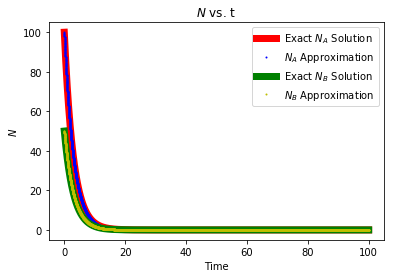

In [13]:
decay_test_ode_solver([100,0],3,1)

Mean absolute error for N_A,0 = 100, N_B,0 = 50, tA/tB = 10.0: 2.2618236251e-13
Mean absolute error for N_A,0 = 100, N_B,0 = 50, tA/tB = 10.0: 4.20339279035e-11


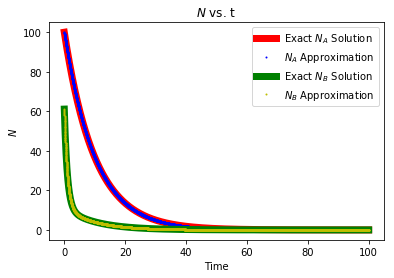

In [14]:
decay_test_ode_solver([100,50],10,1)

Mean absolute error for N_A,0 = 100, N_B,0 = 100, tA/tB = 99.0: 1.40626710277e-12
Mean absolute error for N_A,0 = 100, N_B,0 = 100, tA/tB = 99.0: 8.40418223347e-11


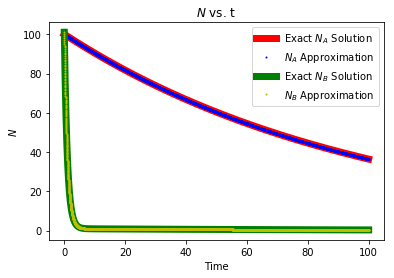

In [15]:
decay_test_ode_solver([100,100],99,1)

Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 10000.0: 8.50192805046e-14
Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 10000.0: 8.24965096236e-18


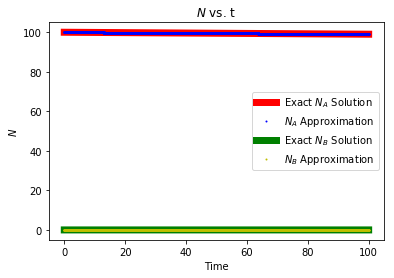

In [16]:
decay_test_ode_solver([100,0],10000,1)

Mean absolute error for N_A,0 = 100, N_B,0 = 50, tA/tB = 10000.0: 8.50192805046e-14
Mean absolute error for N_A,0 = 100, N_B,0 = 50, tA/tB = 10000.0: 4.20139137222e-11


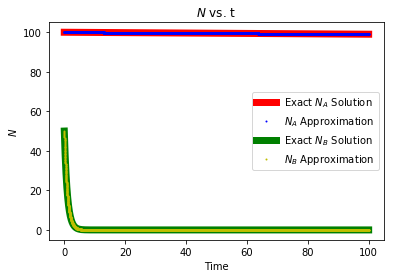

In [17]:
decay_test_ode_solver([100,50],10000,1)

Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 2.0: 1.04451682383e-11
Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 2.0: 1.04451682383e-11


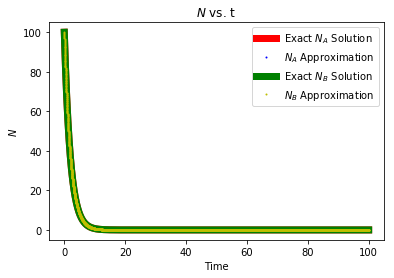

In [32]:
decay_test_ode_solver([100,0],2,1)

Mean absolute error for N_A,0 = 100, N_B,0 = 50, tA/tB = 2.0: 1.04451682383e-11
Mean absolute error for N_A,0 = 100, N_B,0 = 50, tA/tB = 2.0: 5.24590421529e-11


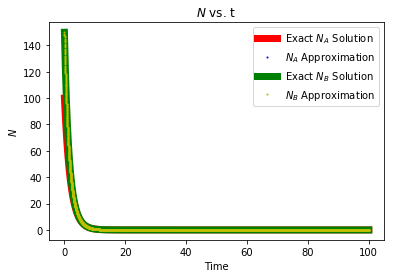

In [18]:
decay_test_ode_solver([100,50],2,1)

Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 1.5: 2.48212598022e-11
Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 1.5: 4.96425159031e-11


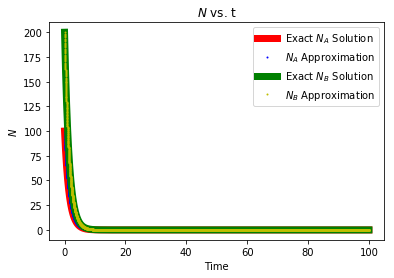

In [33]:
decay_test_ode_solver([100,0],1.5,1)

Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 1.1: 6.30822762956e-11
Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 1.1: 6.3081921929e-10


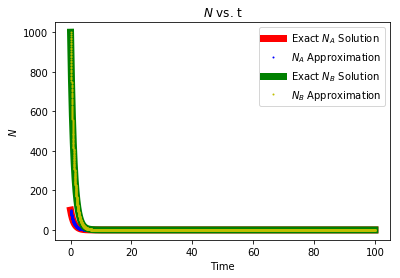

In [34]:
decay_test_ode_solver([100,0],1.1,1)

Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 1.0000000001: 8.40273531471e-11
Mean absolute error for N_A,0 = 100, N_B,0 = 0, tA/tB = 1.0000000001: 0.840274171782


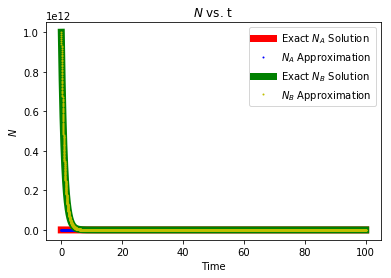

In [35]:
decay_test_ode_solver([100,0],1.0000000001,1)

Mean absolute error for N_A,0 = 100, tA/tB = 0.9: 1.15372288643e-10
Mean absolute error for N_A,0 = 100, tA/tB = 0.9: 1.1537279563e-09


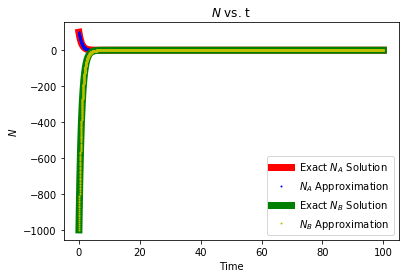

In [63]:
decay_test_ode_solver([100,.9,1)

## c. Limit Analysis

The important limits are $\tau_A >> \tau_B$, $\tau_A = 2\tau_B$, and $\tau_A = \tau_B$. In the limit as $\tau_A$ goes to infinity, $N_A$ stays a constant and $N_B$ goes to $N_{B,0}e^{\frac{-t}{\tau_B}}$. This can be seen most vividly in the fourth and fifth graphs with $\tau_A$ significantly larger than $\tau_B$. When $\tau_A = 2\tau_B$, $N_A$ and $N_B$ follow similar trajectories. When $N_{B,0} = 0$, the curves are equal. This can be seen in the sixth and seventh graphs where the two curves overlap for long and short time scales. As the two constants approach each other, $N_B$ should go to infinity while $N_A$ should be unaffected. This can be seen best in graphs 9 and 10 with the B curve exploding near the origin. The exponential term then takes time bring it back down. The initial value explodes, though. The final graph does not make physical sense, though, as a number of particles cannot be negative.

Higher decay constants slow the rapidity of decay since they decrease the value of the exponential. The half-life of the species is proportional to these constants. As more of species A decreases into B, the rate at which B decays also increases. 

# Problem 4

## a. Exact Solution

$N(t) = \frac{a}{Ce^{-at}+b}$

We notice the solution becomes $Cae^{-at}$ when b = 0, which is the solution to the simpler differential equation $\frac{dN}{dt}=aN$.

## b. Approximations

In [59]:
## exact solution 
## input:  t = time (array)
##         a = birth constant (float)
##         N0 = initial population (float)
##         b = death rate constant (float)
## output: exact values for N
def population_exact(t,a,N0,b):
    C = a/N0 - b
    return a/(C*np.exp(-1*a*t)+b)

# expedited way to test ode approximator with different values of a, N0, and b
def pop_test_ode_solver(a,N0,b):
    
    # ode governing N
    def N_ode(N,t,a=a,b=b):
    
        return a*N - b*N**2
    
    # set time frame
    dt = 0.001
    t0 = 0.0
    tf = 10
    t = np.linspace(t0,tf,10000)
    
    # set intial constants
    C = a/N0 - b 
    
    # retrieve exact values
    N_exact = population_exact(t,a,N0,b)
    
    # retrieve approximations
    t_approx,N_approx = rk4_approx(dt,tf,N_ode,N0)
    
    #plot results
    plt.plot(t,N_exact,'r',linewidth=7,label='Exact Solution')
    plt.plot(t_approx,N_approx,'bo',markersize=3,label='Approximation')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('N vs. T, a = ' + str(a) +', b = '+str(b) +', and N(0) = '+str(N0))
    plt.legend()
    
    print('Mean absolute error for a = ' + str(a) +', b = '+str(b) +', and N(0) = '+str(N0) + ': ' + str(mean_absolute_error(t_approx,N_approx,population_exact,a,N0,b)))
    
    

Mean absolute error for a = 2, b = 0, and N(0) = 100: 0.00693428675908


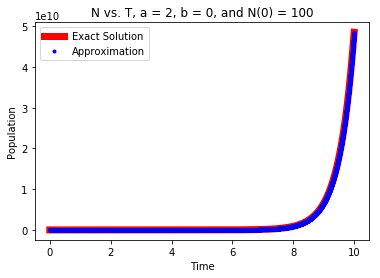

In [60]:
pop_test_ode_solver(2,100,0)

Mean absolute error for a = 1, b = 0, and N(0) = 10: 9.04656376122e-09


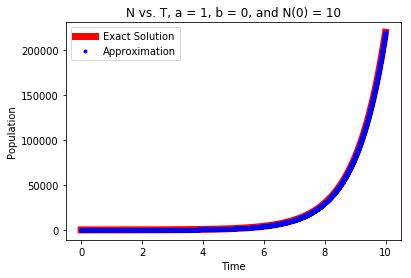

In [61]:
pop_test_ode_solver(1,10,0)

Mean absolute error for a = 3.5, b = 0, and N(0) = 25: 48161.3109544


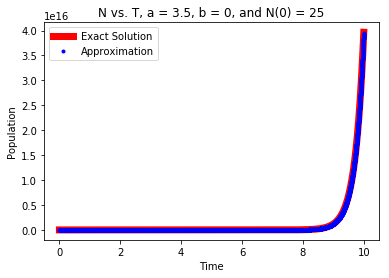

In [62]:
pop_test_ode_solver(3.5,25,0)

Now we try non-zero values of b.

Mean absolute error for a = 10, b = 3, and N(0) = 1: 7.13653869333e-13


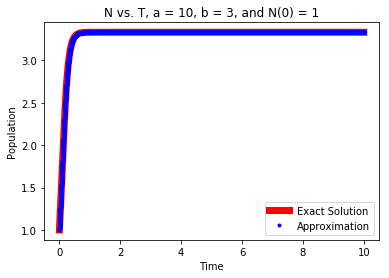

In [63]:
pop_test_ode_solver(10,1,3)

Mean absolute error for a = 12, b = 0.01, and N(0) = 1000: 2.15573174955e-10


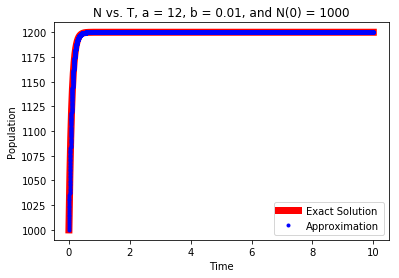

In [68]:
pop_test_ode_solver(12,1000,.01)

Mean absolute error for a = 12, b = 0.01, and N(0) = 1300: 1.78860227606e-10


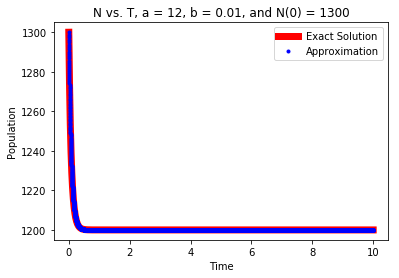

In [69]:
pop_test_ode_solver(12,1300,.01)

As t goes to infinity, the population approaches a limit of a/b. Without the death rate, b, the population exponentially increases. With b there to curtail population growth, the population meets a ceiling, similar to a sigmoid function. The $N^2$ term is important as it shows how population will reach limiting factors such as supply shortages (food, shelter, etc) if the population gets too large. 